In [ ]:
%load_ext autoreload
%autoreload 2

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import os
import sys
import pathlib
import pickle

sys.path.append('..')

In [4]:
import seaborn as sns
import matplotlib.style as style

In [5]:
from pals.evaluation import evaluate_performance
from pals.common import *

In [6]:
style.use('seaborn-poster') # sets the size of the charts
sns.set_context('poster') # everything is larger

# HAT Data Evaluation

This notebook is used to compute precision, recall and F-1 scores on the HAT data for the manuscript.

In [7]:
results = load_obj(os.path.join('test_data', 'HAT', 'HAT_results.p'))

2019-12-16 12:20:14.512 | WARNING  | pals.reactome:get_neo4j_driver:14 - Using a default neo4j server: bolt://localhost:7687
2019-12-16 12:20:14.512 | WARNING  | pals.reactome:get_neo4j_driver:19 - Using a default neo4j username or password: neo4j
2019-12-16 12:20:15.592 | INFO     | pals.reactome:get_neo4j_driver:24 - Created graph database driver for bolt://localhost:7687 (neo4j)


In [8]:
N = 20

### Plasma

In [9]:
experiment_name = 'plasma'
df = evaluate_performance(results, experiment_name, N)
df

2019-12-16 12:20:16.376 | DEBUG    | pals.evaluation:evaluate_performance:72 - Generating PALS full results
2019-12-16 12:20:16.381 | DEBUG    | pals.pathway_analysis:_change_zero_peak_ints:385 - Setting the zero intensity values in the dataframe
2019-12-16 12:20:16.468 | DEBUG    | pals.pathway_analysis:_standardize_intensity_df:366 - Scaling the data across the sample: zero mean and unit variance
2019-12-16 12:20:16.532 | DEBUG    | pals.pathway_analysis:get_plage_activity_df:205 - Mean values of the rows in the DF is [ 0. -0.  0. ... -0. -0. -0.]
2019-12-16 12:20:16.532 | DEBUG    | pals.pathway_analysis:get_plage_activity_df:206 - Variance in the rows of the DF is [1. 1. 1. ... 1. 1. 1.]
2019-12-16 12:20:18.557 | DEBUG    | pals.pathway_analysis:set_up_resample_plage_p_df:217 - Calculating plage p-values with resampling
2019-12-16 12:20:18.558 | DEBUG    | pals.pathway_analysis:set_up_resample_plage_p_df:221 - Comparison Stage2/Stage1
2019-12-16 12:20:18.558 | DEBUG    | pals.pathw

,method,n_sample,i,TP,FP,FN,precision,recall,F1
0,PALS,4,0,4,0,16,1.000000,0.200000,0.333333
1,ORA,4,0,0,2,9,0.000000,0.000000,0.000000
2,PALS,4,1,2,2,18,0.500000,0.100000,0.166667
3,ORA,4,1,0,0,9,0.000000,0.000000,0.000000
4,PALS,4,2,8,1,12,0.888889,0.400000,0.551724
...,...,...,...,...,...,...,...,...,...
595,ORA,12,97,7,6,2,0.538462,0.777778,0.636364
596,PALS,12,98,16,2,4,0.888889,0.800000,0.842105
597,ORA,12,98,8,2,1,0.800000,0.888889,0.842105
598,PALS,12,99,13,7,7,0.650000,0.650000,0.650000


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


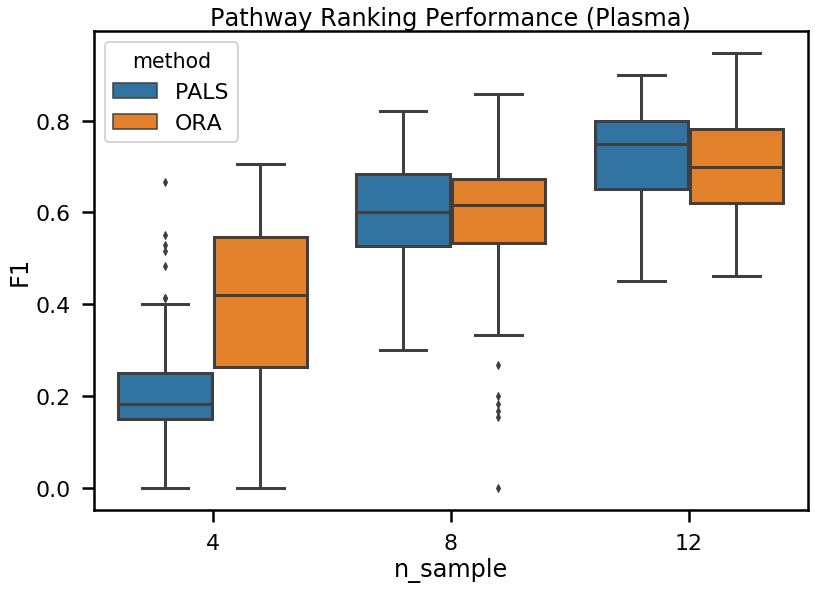

In [10]:
sns.boxplot(x='n_sample', y='F1', hue='method', data=df)
plt.title('Pathway Ranking Performance (Plasma)')
plt.savefig(os.path.join('test_data', 'HAT', 'evaluation_plasma.eps'), dpi=300)

### CSF

In [11]:
experiment_name = 'csf'
df = evaluate_performance(results, experiment_name, N)
df

2019-12-16 12:20:41.614 | DEBUG    | pals.evaluation:evaluate_performance:72 - Generating PALS full results
2019-12-16 12:20:41.618 | DEBUG    | pals.pathway_analysis:_change_zero_peak_ints:385 - Setting the zero intensity values in the dataframe
2019-12-16 12:20:41.679 | DEBUG    | pals.pathway_analysis:_standardize_intensity_df:366 - Scaling the data across the sample: zero mean and unit variance
2019-12-16 12:20:41.714 | DEBUG    | pals.pathway_analysis:get_plage_activity_df:205 - Mean values of the rows in the DF is [ 0.  0.  0. ... -0. -0. -0.]
2019-12-16 12:20:41.715 | DEBUG    | pals.pathway_analysis:get_plage_activity_df:206 - Variance in the rows of the DF is [1. 1. 1. ... 1. 1. 1.]
2019-12-16 12:20:43.687 | DEBUG    | pals.pathway_analysis:set_up_resample_plage_p_df:217 - Calculating plage p-values with resampling
2019-12-16 12:20:43.688 | DEBUG    | pals.pathway_analysis:set_up_resample_plage_p_df:221 - Comparison Stage_1/Stage_2
2019-12-16 12:20:43.688 | DEBUG    | pals.pat

,method,n_sample,i,TP,FP,FN,precision,recall,F1
0,PALS,4,0,7,13,13,0.350000,0.35,0.350000
1,ORA,4,0,11,9,9,0.550000,0.55,0.550000
2,PALS,4,1,7,13,13,0.350000,0.35,0.350000
3,ORA,4,1,14,6,6,0.700000,0.70,0.700000
4,PALS,4,2,9,4,11,0.692308,0.45,0.545455
...,...,...,...,...,...,...,...,...,...
595,ORA,12,97,16,4,4,0.800000,0.80,0.800000
596,PALS,12,98,17,3,3,0.850000,0.85,0.850000
597,ORA,12,98,17,3,3,0.850000,0.85,0.850000
598,PALS,12,99,14,6,6,0.700000,0.70,0.700000


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


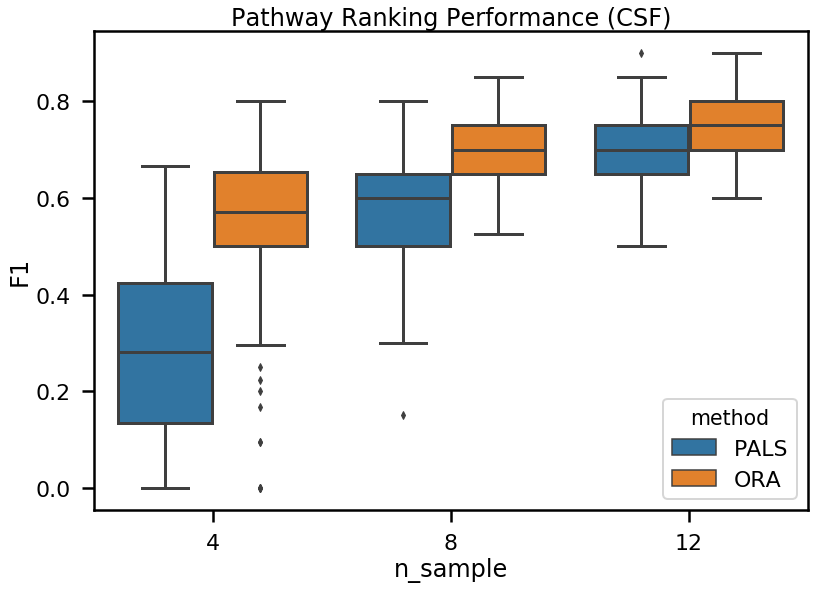

In [12]:
sns.boxplot(x='n_sample', y='F1', hue='method', data=df)
plt.title('Pathway Ranking Performance (CSF)')
plt.savefig(os.path.join('test_data', 'HAT', 'evaluation_csf.eps'), dpi=300)